<a href="https://colab.research.google.com/github/tukangedit/Jasamu/blob/develop-ML/capstone%20project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Library

In [1]:
#install tf
!pip install tensorflow==2.8

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     / 668.3 MB 91.1 MB/s
     |████████████████████████████████| 462 kB 9.0 MB/s 
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.2+zzzcolab20220527125636
    Uninstalling tensorflow-2.8.2+zzzcolab20220527125636:
      Successfully uninstalled tensorflow-2.8.2+zzzcolab20220527125636


In [2]:
#import library
import numpy as np
import pandas as pd
import os
import zipfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import PIL
import shutil
from shutil import copyfile
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

## Prepare Data

In [3]:
#import dataset kaggle
#upload jsonnya dulu before run
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d asdasdasasdas/garbage-classification

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
 85% 70.0M/82.0M [00:01<00:00, 62.2MB/s]
100% 82.0M/82.0M [00:01<00:00, 56.9MB/s]


In [4]:
#unzip dataset
file_zip = "/content/garbage-classification.zip"

zip_ex = zipfile.ZipFile(file_zip, 'r')

zip_ex.extractall('../content')
zip_ex.close()

In [5]:
#lihat banyak image
#define path tiap kelas
source_path = '/content/Garbage classification'

source_path_cardboard = os.path.join("/content/Garbage classification/Garbage classification/cardboard")
source_path_glass = os.path.join("/content/Garbage classification/Garbage classification/glass")
source_path_metal = os.path.join("/content/Garbage classification/Garbage classification/metal")
source_path_paper = os.path.join("/content/Garbage classification/Garbage classification/paper")
source_path_plastic = os.path.join("/content/Garbage classification/Garbage classification/plastic")
source_path_trash = os.path.join("/content/Garbage classification/Garbage classification/trash")


#menghitung jumlah image di tiap folder
print(f"Total cardboard {len(os.listdir(source_path_cardboard))}")
print(f"Total glass {len(os.listdir(source_path_glass))}")
print(f"Total metal {len(os.listdir(source_path_metal))}")
print(f"Total paper {len(os.listdir(source_path_paper))}")
print(f"Total plastic {len(os.listdir(source_path_plastic))}")
print(f"Total trash {len(os.listdir(source_path_trash))}")

Total cardboard 403
Total glass 501
Total metal 410
Total paper 594
Total plastic 482
Total trash 137


##Explore Data

In [6]:
#liat-liat nama image tiap class
train_cardboard_names = os.listdir(source_path_cardboard)
print(train_cardboard_names[:5])

train_glass_names = os.listdir(source_path_glass)
print(train_glass_names[:5])

train_metal_names = os.listdir(source_path_metal)
print(train_metal_names[:5])

train_paper_names = os.listdir(source_path_paper)
print(train_paper_names[:5])

train_plastic_names = os.listdir(source_path_plastic)
print(train_plastic_names[:5])

train_trash_names = os.listdir(source_path_trash)
print(train_trash_names[:5])

['cardboard307.jpg', 'cardboard102.jpg', 'cardboard43.jpg', 'cardboard256.jpg', 'cardboard88.jpg']
['glass404.jpg', 'glass107.jpg', 'glass397.jpg', 'glass46.jpg', 'glass420.jpg']
['metal92.jpg', 'metal315.jpg', 'metal110.jpg', 'metal273.jpg', 'metal385.jpg']
['paper573.jpg', 'paper38.jpg', 'paper99.jpg', 'paper398.jpg', 'paper291.jpg']
['plastic51.jpg', 'plastic439.jpg', 'plastic393.jpg', 'plastic126.jpg', 'plastic79.jpg']
['trash87.jpg', 'trash31.jpg', 'trash1.jpg', 'trash51.jpg', 'trash120.jpg']


In [7]:
#liat gambar pake matplotlib
%matplotlib inline

#nampilin 4 images per class
nrows = 6
ncols = 4

pic_index = 0

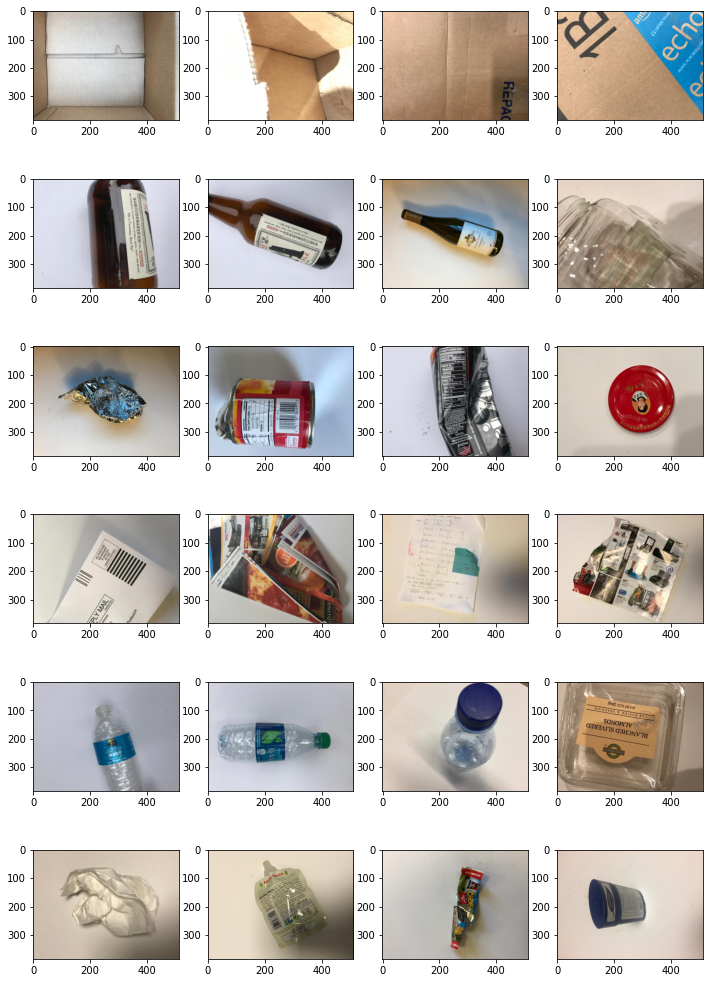

In [8]:
#nampilin gambar
fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index += 5
next_cardboard_pix = [os.path.join(source_path_cardboard, fname) 
                for fname in train_cardboard_names[pic_index-4:pic_index]]
next_glass_pix = [os.path.join(source_path_glass, fname) 
                for fname in train_glass_names[pic_index-4:pic_index]]
next_metals_pix = [os.path.join(source_path_metal, fname) 
                for fname in train_metal_names[pic_index-4:pic_index]]
next_paper_pix = [os.path.join(source_path_paper, fname) 
                for fname in train_paper_names[pic_index-4:pic_index]]
next_plastic_pix = [os.path.join(source_path_plastic, fname) 
                for fname in train_plastic_names[pic_index-4:pic_index]]
next_trash_pix = [os.path.join(source_path_trash, fname) 
                for fname in train_trash_names[pic_index-4:pic_index]]

for i, img_path in enumerate(next_cardboard_pix + next_glass_pix + next_metals_pix + next_paper_pix + next_plastic_pix + next_trash_pix):
  #index subplot mulai dari 1
  sp = plt.subplot(nrows, ncols, i + 1)


  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


## Preprocessing Data

In [9]:
#bikin dir buat train & test
root_dir = '/content/garbage classification'

if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

def create_train_test_dirs(root_path):
  root_path = root_dir
  path = os.path.join(root_dir, "training")
  os.makedirs(path)

  path1 = os.path.join(path, "cardboard")
  os.makedirs(path1)

  path2 = os.path.join(path, "glass")
  os.makedirs(path2)

  path3 = os.path.join(path, "metal")
  os.makedirs(path3)

  path4 = os.path.join(path, "paper")
  os.makedirs(path4)

  path5 = os.path.join(path, "plastic")
  os.makedirs(path5)

  path6 = os.path.join(path, "trash")
  os.makedirs(path6)  

  path = os.path.join(root_dir, "testing")
  os.makedirs(path)

  path1 = os.path.join(path, "cardboard")
  os.makedirs(path1)

  path2 = os.path.join(path, "glass")
  os.makedirs(path2)

  path3 = os.path.join(path, "metal")
  os.makedirs(path3)

  path4 = os.path.join(path, "paper")
  os.makedirs(path4)

  path5 = os.path.join(path, "plastic")
  os.makedirs(path5)

  path6 = os.path.join(path, "trash")
  os.makedirs(path6)
  
  pass

try:
  create_train_test_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [10]:
#bikin dir buat tiap kelas buat train & test
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/content/garbage classification/training
/content/garbage classification/testing
/content/garbage classification/training/trash
/content/garbage classification/training/cardboard
/content/garbage classification/training/paper
/content/garbage classification/training/glass
/content/garbage classification/training/plastic
/content/garbage classification/training/metal
/content/garbage classification/testing/trash
/content/garbage classification/testing/cardboard
/content/garbage classification/testing/paper
/content/garbage classification/testing/glass
/content/garbage classification/testing/plastic
/content/garbage classification/testing/metal


In [11]:
#split data
def split_data(source, train, test, split_size):

  files = []

  for filename in os.listdir(source):
    file = source + filename
    if os.path.getsize(file) > 0:
      files.append(filename)
    else:
      print(filename + " diabaikan.") #kalo length nya 0

    training_length = int(len(files) * split_size)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[:training_length]
    testing_set = shuffled_set[testing_length:]
  
  for filename in training_set:
    source_file = source + filename
    destination_file = train + filename
    copyfile(source_file, destination_file)

  for filename in testing_set:
    source_file = source + filename
    destination_file = test + filename
    copyfile(source_file, destination_file)
  pass

In [12]:
#ngetest func split_data

#define paths
cardboard_source = "/content/Garbage classification/Garbage classification/cardboard/"
glass_source = "/content/Garbage classification/Garbage classification/glass/"
metal_source = "/content/Garbage classification/Garbage classification/metal/"
paper_source = "/content/Garbage classification/Garbage classification/paper/"
plastic_source = "/content/Garbage classification/Garbage classification/plastic/"
trash_source = "/content/Garbage classification/Garbage classification/trash/"

train_dir = "/content/garbage classification/training/"
test_dir = "/content/garbage classification/testing/"

train_cardboard_dir = os.path.join(train_dir, "cardboard/")
test_cardboard_dir = os.path.join(test_dir, "cardboard/")

train_glass_dir = os.path.join(train_dir, "glass/")
test_glass_dir = os.path.join(test_dir, "glass/")

train_metal_dir = os.path.join(train_dir, "metal/")
test_metal_dir = os.path.join(test_dir, "metal/")

train_paper_dir = os.path.join(train_dir, "paper/")
test_paper_dir = os.path.join(test_dir, "paper/")

train_plastic_dir = os.path.join(train_dir, "plastic/")
test_plastic_dir = os.path.join(test_dir, "plastic/")

train_trash_dir = os.path.join(train_dir, "trash/")
test_trash_dir = os.path.join(test_dir, "trash/")

# Empty directories in case you run this cell multiple times
if len(os.listdir(train_cardboard_dir)) > 0:
  for file in os.scandir(train_cardboard_dir):
    os.remove(file.path)
if len(os.listdir(train_glass_dir)) > 0:
  for file in os.scandir(train_glass_dir):
    os.remove(file.path)
if len(os.listdir(train_metal_dir)) > 0:
  for file in os.scandir(train_metal_dir):
    os.remove(file.path)
if len(os.listdir(train_paper_dir)) > 0:
  for file in os.scandir(train_paper_dir):
    os.remove(file.path)
if len(os.listdir(train_plastic_dir)) > 0:
  for file in os.scandir(train_plastic_dir):
    os.remove(file.path)
if len(os.listdir(train_trash_dir)) > 0:
  for file in os.scandir(train_trash_dir):
    os.remove(file.path)

if len(os.listdir(test_cardboard_dir)) > 0:
  for file in os.scandir(test_cardboard_dir):
    os.remove(file.path)
if len(os.listdir(test_glass_dir)) > 0:
  for file in os.scandir(test_glass_dir):
    os.remove(file.path)
if len(os.listdir(test_metal_dir)) > 0:
  for file in os.scandir(test_metal_dir):
    os.remove(file.path)
if len(os.listdir(test_paper_dir)) > 0:
  for file in os.scandir(test_paper_dir):
    os.remove(file.path)
if len(os.listdir(test_plastic_dir)) > 0:
  for file in os.scandir(test_plastic_dir):
    os.remove(file.path)
if len(os.listdir(test_trash_dir)) > 0:
  for file in os.scandir(test_trash_dir):
    os.remove(file.path)

split_size = 0.8

split_data(cardboard_source, train_cardboard_dir, test_cardboard_dir, split_size)
split_data(glass_source, train_glass_dir, test_glass_dir, split_size)
split_data(metal_source, train_metal_dir, test_metal_dir, split_size)
split_data(paper_source, train_paper_dir, test_paper_dir, split_size)
split_data(plastic_source, train_plastic_dir, test_plastic_dir, split_size)
split_data(trash_source, train_trash_dir, test_trash_dir, split_size)

print(f"Training image cardboard {len(os.listdir(train_cardboard_dir))}")
print(f"Training image glass {len(os.listdir(train_glass_dir))}")
print(f"Training image metal {len(os.listdir(train_metal_dir))}")
print(f"Training image paper {len(os.listdir(train_paper_dir))}")
print(f"Training image plastic {len(os.listdir(train_plastic_dir))}")
print(f"Training image trash {len(os.listdir(train_trash_dir))}")

print(f"\nTesting image cardboard {len(os.listdir(test_cardboard_dir))}")
print(f"Testing image glass {len(os.listdir(test_glass_dir))}")
print(f"Testing image metal {len(os.listdir(test_metal_dir))}")
print(f"Testing image paper {len(os.listdir(test_paper_dir))}")
print(f"Testing image plastic {len(os.listdir(test_plastic_dir))}")
print(f"Testing image trash {len(os.listdir(test_trash_dir))}")

Training image cardboard 322
Training image glass 400
Training image metal 328
Training image paper 475
Training image plastic 385
Training image trash 109

Testing image cardboard 322
Testing image glass 400
Testing image metal 328
Testing image paper 475
Testing image plastic 385
Testing image trash 109


In [13]:
#data augmentation
def train_test_generators(train_dir, test_dir):

  train_datagen = ImageDataGenerator(
      rescale=1/255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      vertical_flip=True,
      fill_mode='nearest')

  train_gen = train_datagen.flow_from_directory(directory=train_dir,
                                                      batch_size=32,
                                                      class_mode='categorical',
                                                      target_size=(300, 300))

  test_datagen = ImageDataGenerator(rescale = 1/255)

  test_gen = test_datagen.flow_from_directory(directory=test_dir,
                                                                batch_size=16,
                                                                class_mode='categorical',
                                                                target_size=(300, 300))
  
  return train_gen, test_gen

In [14]:
#ngetest func train_test_generator
train_gen, test_gen = train_test_generators(train_dir, test_dir)

Found 2019 images belonging to 6 classes.
Found 2019 images belonging to 6 classes.


##Build Model

In [15]:
model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(16, (3, 3), activation = "relu", input_shape = (300, 300, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.BatchNormalization(axis=1),

      tf.keras.layers.Conv2D(16, (3, 3), activation = "relu"),
      tf.keras.layers.MaxPooling2D(2, 2),

      tf.keras.layers.Conv2D(64, (3, 3), activation = "relu"),

      tf.keras.layers.Conv2D(64, (3, 3), activation = "relu"),
      tf.keras.layers.MaxPooling2D(2, 2),

      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation = "relu"),
      tf.keras.layers.Dense(6, activation = "softmax")                             
    ])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 149, 149, 16)     596       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 16)      2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 16)       0         
 2D)                                                             
                                                        

In [16]:
model.compile(
    optimizer = ("adam"),
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)

## Train Model

In [17]:
history = model.fit(
      train_gen,  
      epochs = 20,
      #steps_per_epoch = 15,
      verbose = 1,
      validation_data = test_gen,
      #validation_steps = 20
      )

Epoch 1/20
64/64 [==============================] - 293s 5s/step - loss: 2.4230 - accuracy: 0.3393 - val_loss: 1.7507 - val_accuracy: 0.1976
Epoch 2/20
64/64 [==============================] - 276s 4s/step - loss: 1.3999 - accuracy: 0.4567 - val_loss: 1.5462 - val_accuracy: 0.4656
Epoch 3/20
64/64 [==============================] - 280s 4s/step - loss: 1.2576 - accuracy: 0.5186 - val_loss: 1.4361 - val_accuracy: 0.4943
Epoch 4/20
64/64 [==============================] - 279s 4s/step - loss: 1.2020 - accuracy: 0.5329 - val_loss: 1.2321 - val_accuracy: 0.5527
Epoch 5/20
64/64 [==============================] - 285s 4s/step - loss: 1.1903 - accuracy: 0.5399 - val_loss: 1.1563 - val_accuracy: 0.6008
Epoch 6/20
64/64 [==============================] - 278s 4s/step - loss: 1.1603 - accuracy: 0.5607 - val_loss: 1.1233 - val_accuracy: 0.5577
Epoch 7/20
64/64 [==============================] - 285s 4s/step - loss: 1.1108 - accuracy: 0.5840 - val_loss: 0.9788 - val_accuracy: 0.6459
Epoch 8/20
64

## Visualize Result

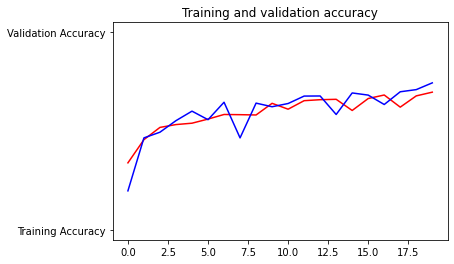

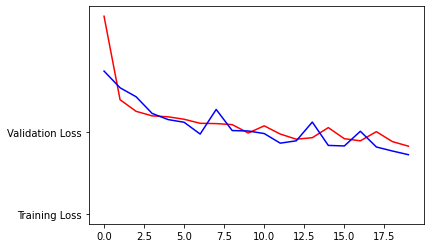

In [18]:

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

## Export Model

In [19]:
garbage_saved_model = "garbage_saved_model"

In [20]:
tf.saved_model.save(model, garbage_saved_model)

INFO:tensorflow:Assets written to: garbage_saved_model/assets


In [21]:
%%bash -s $garbage_saved_model
saved_model_cli show --dir $1 --tag_set serve --signature_def serving_default

The given SavedModel SignatureDef contains the following input(s):
  inputs['conv2d_input'] tensor_info:
      dtype: DT_FLOAT
      shape: (-1, 300, 300, 3)
      name: serving_default_conv2d_input:0
The given SavedModel SignatureDef contains the following output(s):
  outputs['dense_1'] tensor_info:
      dtype: DT_FLOAT
      shape: (-1, 6)
      name: StatefulPartitionedCall:0
Method name is: tensorflow/serving/predict


In [22]:
loaded = tf.saved_model.load(garbage_saved_model)

In [23]:
print(list(loaded.signatures.keys()))
infer = loaded.signatures["serving_default"]
print(infer.structured_input_signature)
print(infer.structured_outputs)

['serving_default']
((), {'conv2d_input': TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name='conv2d_input')})
{'dense_1': TensorSpec(shape=(None, 6), dtype=tf.float32, name='dense_1')}


In [ ]:
#input image
uploaded = files.upload()

for fn in uploaded.keys():
 
  #predict images
  path = fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=16)
  print(fn)
  print(classes)

## Convert Model Using TFLite

In [28]:
converter = tf.lite.TFLiteConverter.from_saved_model(garbage_saved_model)
#converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

In [29]:
tflite_model_file = 'converted_model.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

In [30]:
# Load TFLite model and allocate tensors.
with open(tflite_model_file, 'rb') as fid:
    tflite_model = fid.read()
    
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]